In [1]:
library("mice")
library("dplyr")
library("ggplot2")
library("VIM")
library('xlsx')

Loading required package: lattice

Attaching package: 'mice'

The following objects are masked from 'package:base':

    cbind, rbind


Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union

Loading required package: colorspace
Loading required package: grid
Loading required package: data.table

Attaching package: 'data.table'

The following objects are masked from 'package:dplyr':

    between, first, last

VIM is ready to use. 
 Since version 4.0.0 the GUI is in its own package VIMGUI.

          Please use the package to use the new (and old) GUI.

Suggestions and bug-reports can be submitted at: https://github.com/alexkowa/VIM/issues

Attaching package: 'VIM'

The following object is masked from 'package:datasets':

    sleep



# Patron de datos faltantes

In [2]:
#data = read.xlsx('datos_reales/indicatorsAfterFilters_sin_rep.xlsx',"SUR")
data = read.xlsx('datos_reales/CHL.xlsx',"influyentes y sin correlacion")
data[data==""]=NA
rownames(data) <- data$year
data = data[-(1)]

In [3]:
data

,DC.DAC.FRAL.CD,DC.DAC.CECL.CD,DC.DAC.CHEL.CD,NV.IND.MANF.KD.ZG,NE.GDI.TOTL.KD.ZG,DC.DAC.USAL.CD,NV.SRV.TOTL.KD.ZG,NY.TRF.NCTR.CN,NY.ADJ.NNTY.PC.KD.ZG,NY.GNP.PCAP.KD.ZG,...,GC.TAX.TOTL.GD.ZS,GC.XPN.COMP.ZS,GC.XPN.GSRV.ZS,IQ.SCI.PRDC,MS.MIL.MPRT.KD,MS.MIL.TOTL.P1,VC.IHR.PSRC.FE.P5,SL.EMP.1524.SP.MA.NE.ZS,SL.IND.EMPL.ZS,SL.TLF.ACTI.1524.NE.ZS
2002,11750000,7110000,1050000,2.282044762,0.827541324,NA,3.6716988,4.01519e+11,1.4259737,1.4418051,...,16.20170,20.66964,8.557085,NA,7.4e+07,117300,NA,35.6970,23.857,36.31100082
2003,12880000,10490000,1210000,1.119924268,0.550035936,-3020000,5.1055706,4.35704e+11,1.2352153,0.8391240,...,15.94896,20.82987,8.138862,NA,1.87e+08,114100,NA,35.0430,23.395,36.08399963
2004,NA,16680000,1690000,6.600785693,8.265673635,-1740000,7.3900597,6.81718e+11,5.2914433,3.5166390,...,16.40223,20.93046,9.076127,93.33333,7e+07,116000,NA,34.7640,23.602,36.35100174
2005,14400000,23280000,1110000,3.257283633,27.17966478,-120000,7.0941922,1.01536e+12,7.2944249,3.8025298,...,18.02512,20.96063,10.130692,93.33333,4.49e+08,116000,1.017180298,34.4990,22.953,36.20000076
2006,9870000,12300000,1170000,5.141347382,14.41657585,-310000,7.3891882,1.8335e+12,1.9976394,0.1891294,...,19.49191,20.86325,10.567692,93.33333,NA,103000,1.103524414,35.6460,23.291,36.61800003
2007,10180000,12510000,790000,2.602416839,4.35047537,-1060000,7.7456422,1.66218e+12,6.4468123,4.9345295,...,20.25693,21.00051,11.252845,93.33333,6.62e+08,103000,1.332160712,35.9700,23.381,37.14500046
2008,9100000,6460000,1000000,1.264355069,24.93514943,950000,5.2764984,1.52344e+12,0.8854268,7.2892237,...,18.71186,20.34862,9.758001,96.66667,3.97e+08,103000,1.223644713,37.4350,23.540,NA
2009,9600000,10800000,1330000,NA,NA,1840000,-0.3289782,9.1113e+11,3.0544294,-1.6434954,...,14.52310,20.33905,9.942340,96.66667,3.35e+08,103771,1.168668793,34.1500,23.474,38.42900085
2010,10130000,16150000,1890000,3.268086553,34.20739863,NA,6.5602516,NA,10.1029386,4.0632161,...,17.35651,20.38086,10.408129,93.33333,4.75e+08,103771,1.118484956,36.5566,22.957,37.69630051
2011,9680000,NA,950000,NA,17.34492116,3700000,7.8876684,1.42505e+12,6.3198663,6.3057323,...,18.85899,20.36051,10.807048,93.33333,3.26e+08,103750,1.327502021,37.5504,23.375,38.59550095


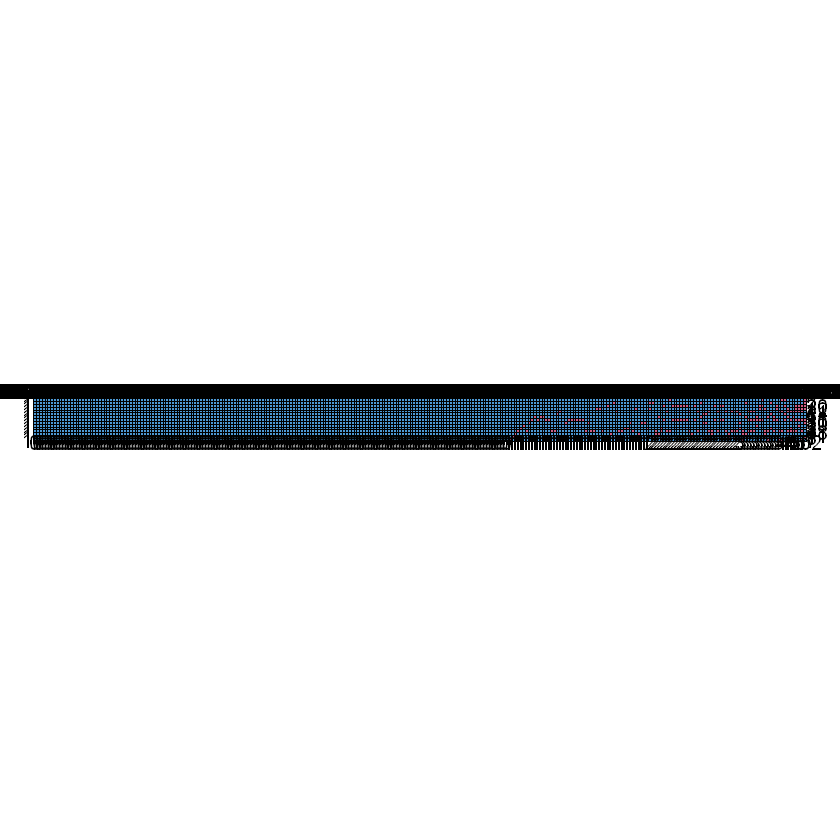

In [4]:
len = length(data)
pattern<-md.pattern(data[,c(1:len)])

# Histograma de datos faltantes


 Variables sorted by number of missings: 
                Variable      Count
          NY.GDP.DISC.CN 0.46666667
       IC.TAX.LABR.CP.ZS 0.40000000
             PA.NUS.FCRF 0.33333333
       SE.PRM.TCHR.FE.ZS 0.33333333
          AG.LND.AGRI.ZS 0.26666667
          IS.RRS.PASG.KM 0.26666667
    TM.TAX.MANF.WM.FN.ZS 0.26666667
       TX.MNF.TECH.ZS.UN 0.26666667
       VC.IHR.PSRC.FE.P5 0.26666667
    BX.TRF.PWKR.DT.GD.ZS 0.20000000
          DC.DAC.JPNL.CD 0.20000000
          SE.PRE.ENRR.FE 0.20000000
       SE.PRM.ENRL.TC.ZS 0.20000000
    SE.SEC.ENRL.UP.TC.ZS 0.20000000
    SE.SEC.ENRL.LO.TC.ZS 0.20000000
       EG.USE.COMM.FO.ZS 0.20000000
       SH.STA.ODFC.UR.ZS 0.20000000
          IS.RRS.TOTL.KM 0.20000000
    TM.TAX.TCOM.WM.FN.ZS 0.20000000
          VC.IHR.PSRC.P5 0.20000000
          BN.RES.INCL.CD 0.20000000
       NY.ADJ.DKAP.GN.ZS 0.20000000
          EG.USE.CRNW.ZS 0.20000000
          SG.GEN.PARL.ZS 0.20000000
          DC.DAC.CECL.CD 0.13333333
       NV.IND.MANF.KD

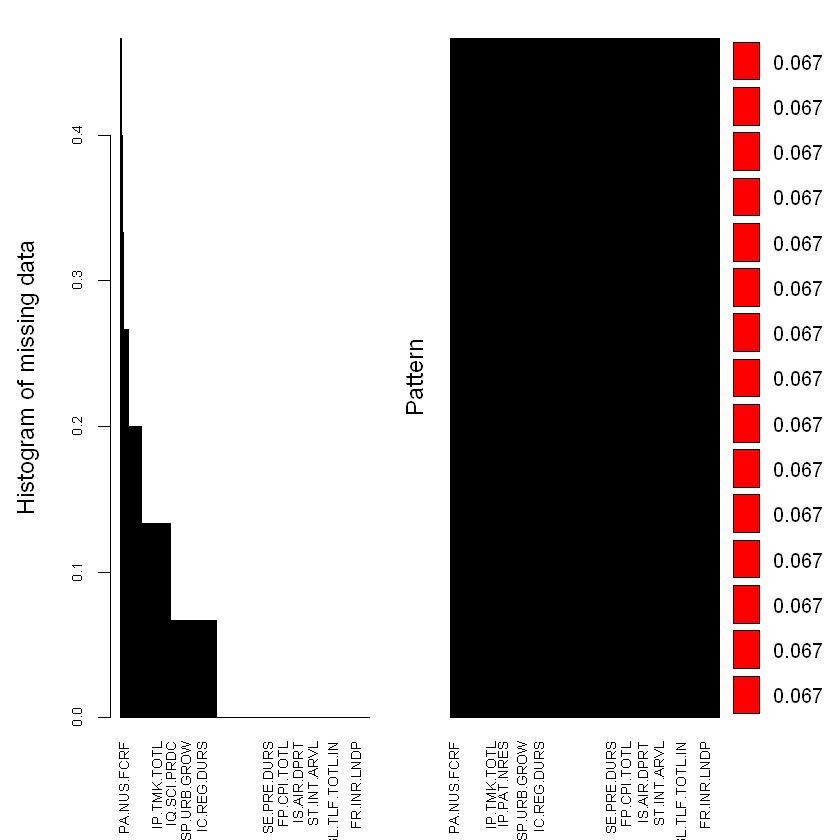

In [5]:
aggr_plot <- aggr(data[,c(1:len)], col=c('navyblue','red'), numbers=TRUE, sortVars=TRUE, labels=names(data), cex.axis=.7, gap=3, ylab=c("Histogram of missing data","Pattern"))

# Grafico de concurrencia de datos faltantes

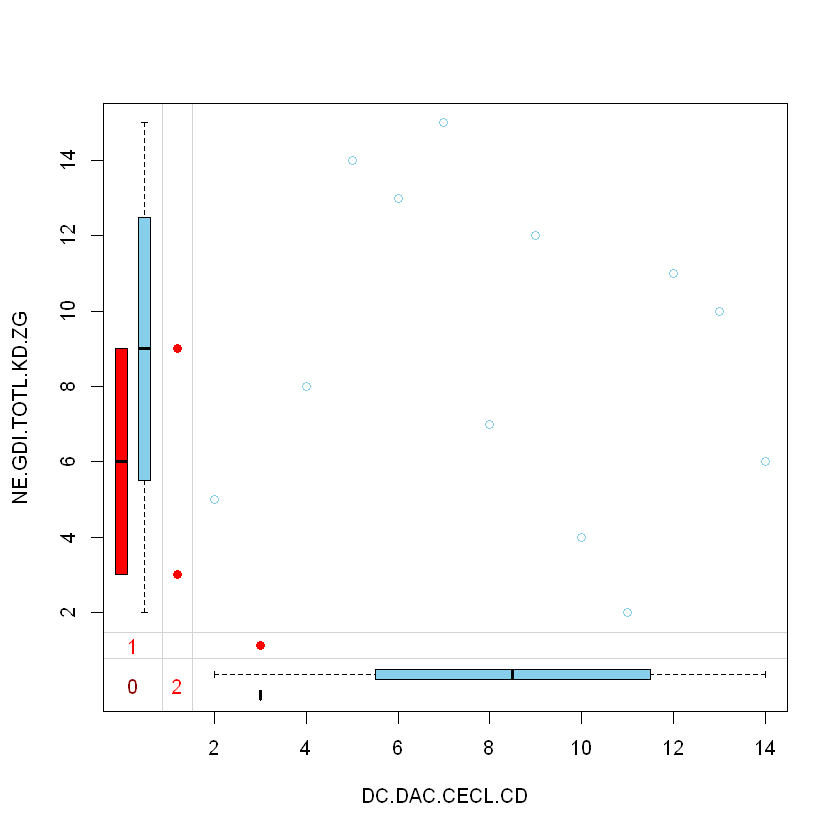

In [6]:
marginplot(data[c(2,5)])

# Imputacion de datos 

In [7]:
#funcion para imputar datos que han sido eliminados manualmente
imputarDelData <-function(ruta, paises, metodo, archivo){
    tamaño = length(paises)
    for (i in paises){
        data = read.xlsx(ruta,i)
        data <- as.data.frame(data)
        data[data==""]=NA
        #definir la cantidad de datos a imputar
        imp <- mice(data[c(1:25),], method=metodo, seed=1, print=FALSE, m=5, maxit=20)
        compl = mice::complete(imp)
        write.xlsx(compl, archivo, sheetName=i, col.names=TRUE, row.names=FALSE, append=TRUE, showNA=TRUE, password=NULL)
    }
}

#ruta = 'datos_reales/delData.xlsx'
#paises = c('ARG','BOL', 'BRA', 'CHL', 'COL', 'ECU','GUY', 'PER', 'PRY','SUR','TTO', 'URY', 'VEN')
#metodo = "cart"
#archivo = "imputacionDelDataCart.xlsx"
#imputar(ruta, paises, metodo, archivo)

In [ ]:
ruta = 'datos_reales/delData.xlsx'
paises = c('ARG','BOL', 'BRA', 'CHL', 'COL', 'ECU','GUY', 'PER', 'PRY','SUR','TTO', 'URY', 'VEN')
metodo = "pmm"
archivo = "imputacionDelPmm.xlsx"
imputarDelData(ruta, paises, metodo, archivo)

In [8]:
#funcion para imputar
imputar <-function(ruta, paises, metodo, archivo){
    tamaño = length(paises)
    for (i in paises){
        data = read.xlsx(ruta,i)
        data <- as.data.frame(data)
        data[data==""]=NA
        #definir la cantidad de datos a imputar
        imp <- mice(data, method=metodo, seed=1, print=FALSE, m=5, maxit=20)
        compl = mice::complete(imp)
        write.xlsx(compl, archivo, sheetName=i, col.names=TRUE, row.names=FALSE, append=TRUE, showNA=TRUE, password=NULL)
    }
}

In [ ]:
#ruta: indica la direccion del archivo a imputar; solo formato xlsx
#paises: codigo de indicadores de cada pais, establecido como sheet en ruta
#metodo: metodo de imputacion(pmm, cart) observacion:averiguar en la libreria mice para mas metodos
#archivo: nombre del archivo a guardar, solo formato xlxs
ruta = 'datos_reales/CHL.xlsx'
#paises = c('ARG','BOL', 'BRA', 'CHL', 'COL', 'ECU','GUY', 'PER', 'PRY','SUR','TTO', 'URY', 'VEN')
paises = c('influyentes y sin correlacion')
metodo = "cart"
archivo = "imputacionCHL.xlsx"
imputar(ruta, paises, metodo, archivo)

# PCA

# https://rpubs.com/Cristina_Gil/PCA
http://www.sthda.com/english/wiki/factoextra-r-package-easy-multivariate-data-analyses-and-elegant-visualization
https://rpubs.com/Cristina_Gil/PCA

In [ ]:
library("FactoMineR")
library("factoextra")
#library("dtw")

In [ ]:
#data = read.xlsx('datos_reales/intersectionPerCountry.xlsx',"ARG")
data = read.xlsx('datos_reales/imputacionCHL.xlsx',"CHL")

In [ ]:
sdata = scale(data[,2:ncol(data)], center = TRUE, scale = TRUE)
rownames(sdata)<-data[,1]

In [ ]:
head(data)

In [ ]:
nrow(data)

In [ ]:
sdata[1:7,]

In [ ]:
#pca de factor minerR
res.pca <- PCA(X = data[20:nrow(data),1:ncol(data)], scale.unit = FALSE, ncp = 64, graph = FALSE)

In [ ]:
# Obtencion de valores propios, varianza de cada componente y la varianza acomulativa
#los valores propios mas altos indican que esa componente mantiene la mayor cantidad de informacion
get_eig(res.pca)

In [ ]:
#res.pca$var

In [ ]:
fviz_screeplot(res.pca, addlabels = TRUE, ylim = c(0, 70))

In [ ]:
# Extract the results for variables
var <- get_pca_var(res.pca)
var

In [ ]:
# Coordinates of variables
head(var$cor)

In [ ]:
# Contribution of variables
head(var$contrib)

In [ ]:
# Control variable colors using their contributions
#fviz_pca_var(res.pca, col.var = "black")
fviz_pca_var(res.pca, col.var="contrib",
             gradient.cols = c("#00AFBB", "#E7B800", "#FC4E07"),
             repel = FALSE # Avoid text overlapping
             )

In [ ]:
# Contributions of variables to PC1
fviz_contrib(res.pca, choice = "var", axes = 1, top = 10)
# Contributions of variables to PC2
fviz_contrib(res.pca, choice = "var", axes = 2, top = 10)

In [ ]:
# Extract the results for individuals
ind <- get_pca_ind(res.pca)
ind

In [ ]:
# Coordinates of individuals
#rownames(res.pca$ind$coord) <- data$NA.

In [ ]:
#fviz_pca_ind(res.pca, col.var = "black", repel = TRUE)

In [ ]:
# Graph of individuals
#fviz_pca_ind(res.pca, col.var = "black")
# 1. Use repel = TRUE to avoid overplotting
# 2. Control automatically the color of individuals using the cos2
    # cos2 = the quality of the individuals on the factor map
    # Use points only
# 3. Use gradient color
fviz_pca_ind(res.pca, col.ind = "cos2",
             gradient.cols = c("#00AFBB", "#E7B800", "#FC4E07"),
             repel = TRUE # Avoid text overlapping (slow if many points)
             )

In [ ]:
# Biplot of individuals and variables
fviz_pca_biplot(res.pca, repel = FALSE)

In [ ]:
#clusteriza las agrupaciones mediante una elipse
# Compute PCA on the dataset
# before PCA analysis
#rownames(res.pca$ind$coord) <- rownames(data)
data.pca <- PCA(iris[,1:-5], graph = FALSE)
# Visualize
# Use habillage to specify groups for coloring
fviz_pca_ind(data.pca,
             label = "none", # hide individual labels
             habillage = rownames(data), # color by groups
             #palette = c("#00AFBB", "#E7B800", "#FC4E07"),
             addEllipses = TRUE # Concentration ellipses
             )

In [ ]:
sdata = (data)
init = 1
end = ncol(data)

In [ ]:
mean = colMeans(sdata[,init:end])

In [ ]:
Sx<-cov(sdata[,init:end])

In [ ]:
dist.data=mahalanobis(sdata[,init:end],mean,Sx)

In [ ]:
dist.data = dist(t(sdata[,init:end]))

In [ ]:
dend.data = as.dendrogram(hclust(dist.data))

In [ ]:
# Compute hierarchical clustering and cut into 4 clusters
#acpta solo 4 clusters
res <- hcut(dist.data, k = 4, stand = FALSE)
# Visualize
fviz_dend(res, rect = TRUE, cex = 0.4,
          k_colors = c("#00AFBB","#2E9FDF", "#E7B800", "#FC4E07"))

In [ ]:
my_data <- scale(dist.data)
fviz_nbclust(my_data, kmeans, method = "gap_stat")

# DPCA

In [ ]:
roll_PCA <- function(x){
  #oo <- prcomp(x, scale=FALSE)$sdev^2
  oo<- prcomp(x)$rot
  oo / sum(oo)
  #sumaComulativa(oo)
  }

In [ ]:
optimo <- function(n,windows,data){
    varianza <- sapply(seq_len(n - windows + 1), function (i) roll_PCA(data[i:(i + windows - 1),1:ncol(data)]))
    varianza <- t(varianza)
    suma <- sum(varianza[,1:2])/nrow(varianza)
}

In [ ]:
rows <- nrow(data)
max<-sapply(seq_len(rows), function(i) optimo(rows,i,data))
#max <-max(max)
max

In [ ]:
DPCA <- function(n,windows,data){
    varianza <- sapply(seq_len(n - windows + 1), function (i) roll_PCA(data[i:(i + windows - 1),1:ncol(data)]))
    varianza <- t(varianza)
}

In [ ]:
n <- nrow(data)
windows<-8
var.dpca <- DPCA(n,windows,data)

In [ ]:
print(var.dpca)

In [ ]:
matplot(var.dpca[,1:ncol(var.dpca)], type = "l", lty = 1, col = 1:ncol(var.dpca),
        xlab = "period", ylab = "proportional variance")

In [ ]:
com.df <- as.data.frame(oo)